Early timestep (10): tensor([-0.5440,  0.4430,  0.6591,  0.1919])
Mid timestep (500): tensor([-0.4678,  0.8156, -0.9896, -0.2267])
Mid timestep 2 (501): tensor([-0.9965,  0.6330, -0.9974, -0.2455])
Late timestep (990): tensor([-0.3879,  0.9925,  0.8456,  0.2613])


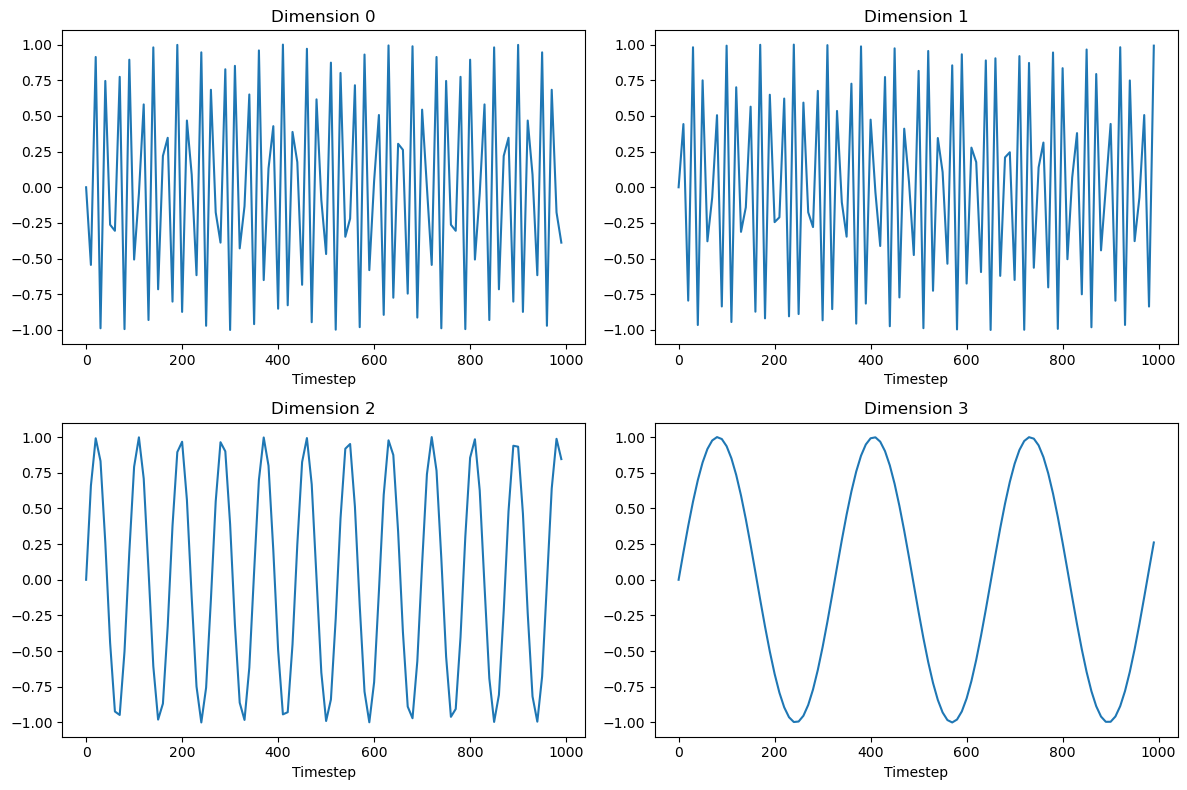

In [2]:
import matplotlib.pyplot as plt
import torch
from models.unet import SinusoidalPositionEmbeddings

embedder = SinusoidalPositionEmbeddings(16)
timesteps = torch.arange(0, 1000, 10)
embeddings = embedder(timesteps)  # Shape: (100, 16)

# Plot first 4 dimensions (2 sin, 2 cos)
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(timesteps.numpy(), embeddings[:, i].numpy())
    plt.title(f'Dimension {i}')
    plt.xlabel('Timestep')
plt.tight_layout()
plt.show()

What the unet does during training is to learn these patterns that encode different timesteps so that during inference when the unet recognise a pattern for t=990, it knows the image is mostly noise, so it denoise more aggressively. Conversely, if the unet recognises that the pattern is t=5, it knows the image is well formed already and denoises less aggressively.

how does this happen? well,
- high frequency (fast oscillations) distinguish fine-grained timesteps (e.g., 500 vs 501). so this helps the unet to learn the difference between t=500 and t=501.
- low frequency instead (low oscillations) distinguish coarse regions (early vs mid vs late denoise), so the unet learns that t=500 is definitely different from t=1.

Toghether they give the unet a complete picture